# Faraz Ali
## Email: fa06396@st.habib.edu.pk
### Time Series Analysis

In [ ]:
from pylab import rcParams
import matplotlib
import statsmodels.api as sm
import pandas as pd
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
import math
warnings.filterwarnings("ignore")  # optional
plt.style.use('fivethirtyeight')  # optional
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

## Q1

In [ ]:
df = pd.read_csv('karachi-weather-2021-2023.csv', parse_dates= ['datetime'])
df = df.set_index('datetime')
df.head()

,temp
datetime,
2021-01-01,15.0
2021-01-02,15.4
2021-01-03,15.6
2021-01-04,16.3
2021-01-05,17.1


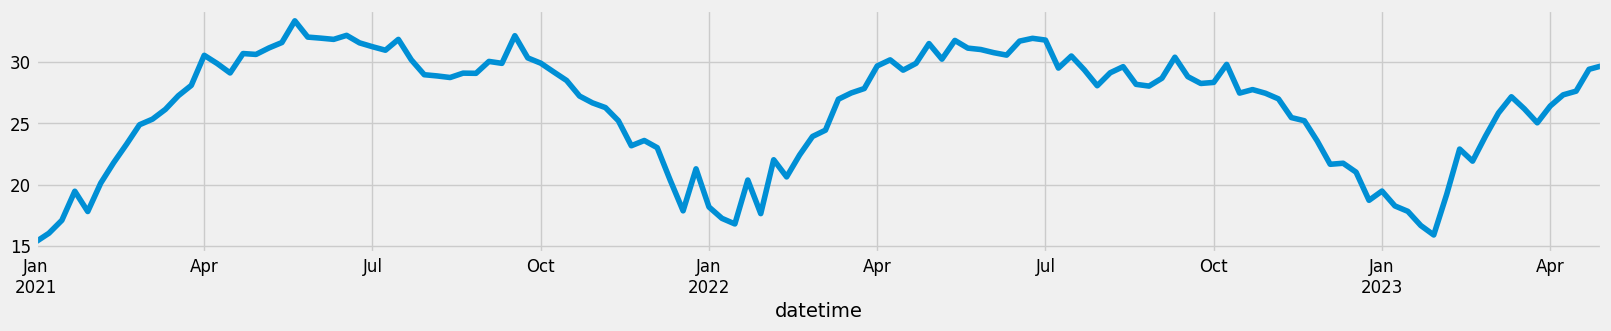

In [ ]:
weekly = df['temp'].resample('W').mean()
weekly.plot(figsize=(18, 3))
plt.show()

## Q2

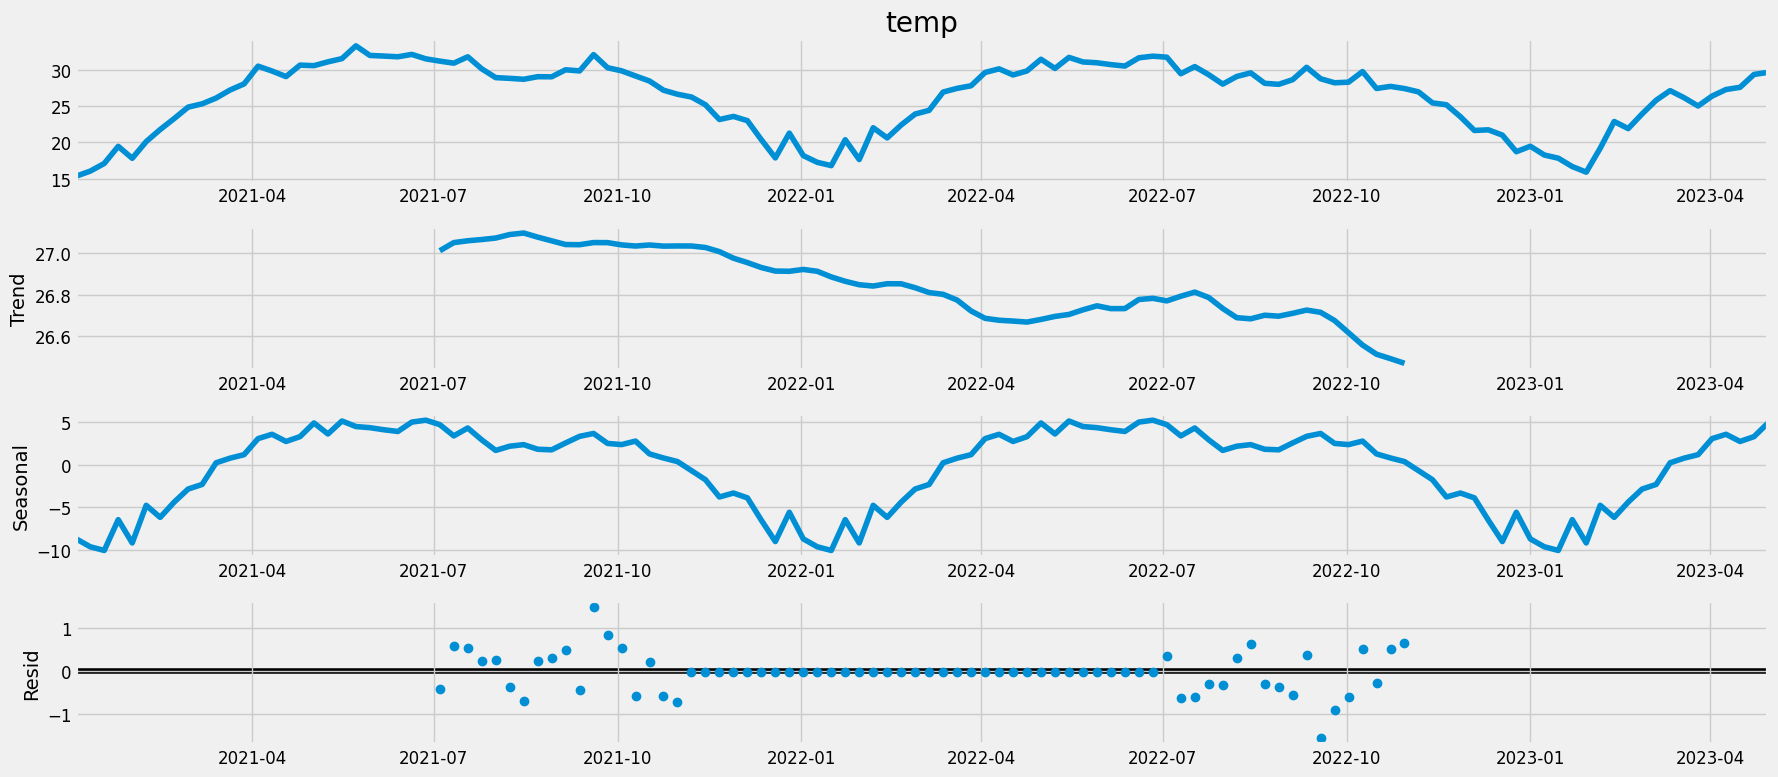

In [ ]:
decomposition = sm.tsa.seasonal_decompose(weekly, model='additive')
rcParams['figure.figsize'] = 18, 8
fig = decomposition.plot()
plt.show()

### Analysis:

The trend component of a dataset indicates whether the data exhibits an increasing or decreasing pattern. In the provided plot, we observe a clear decreasing trend throughout the dataset, although there are some instances where the temperature seems to increase. This decline in temperature may be attributed to global warming, which results from changes in atmospheric patterns leading to colder temperatures on average. On the other hand, the seasonality component of a dataset refers to any pattern that regularly repeats itself with constant length. The seasonal graph above shows several patterns occurring throughout the year, with an increase in temperature during the first half and a decrease in the second half of each year. This trend makes sense given that Karachi experiences hot summers and cold winters. Finally, the residuals component represents the portion of the data that cannot be explained by trend and seasonal patterns. We can observe variations in the temperature data from the seasonal patterns and trends during certain periods. These discrepancies could be due to the model's inability to capture all the patterns in the data, or they may be outliers resulting from unexpected weather conditions or errors.

## Q3

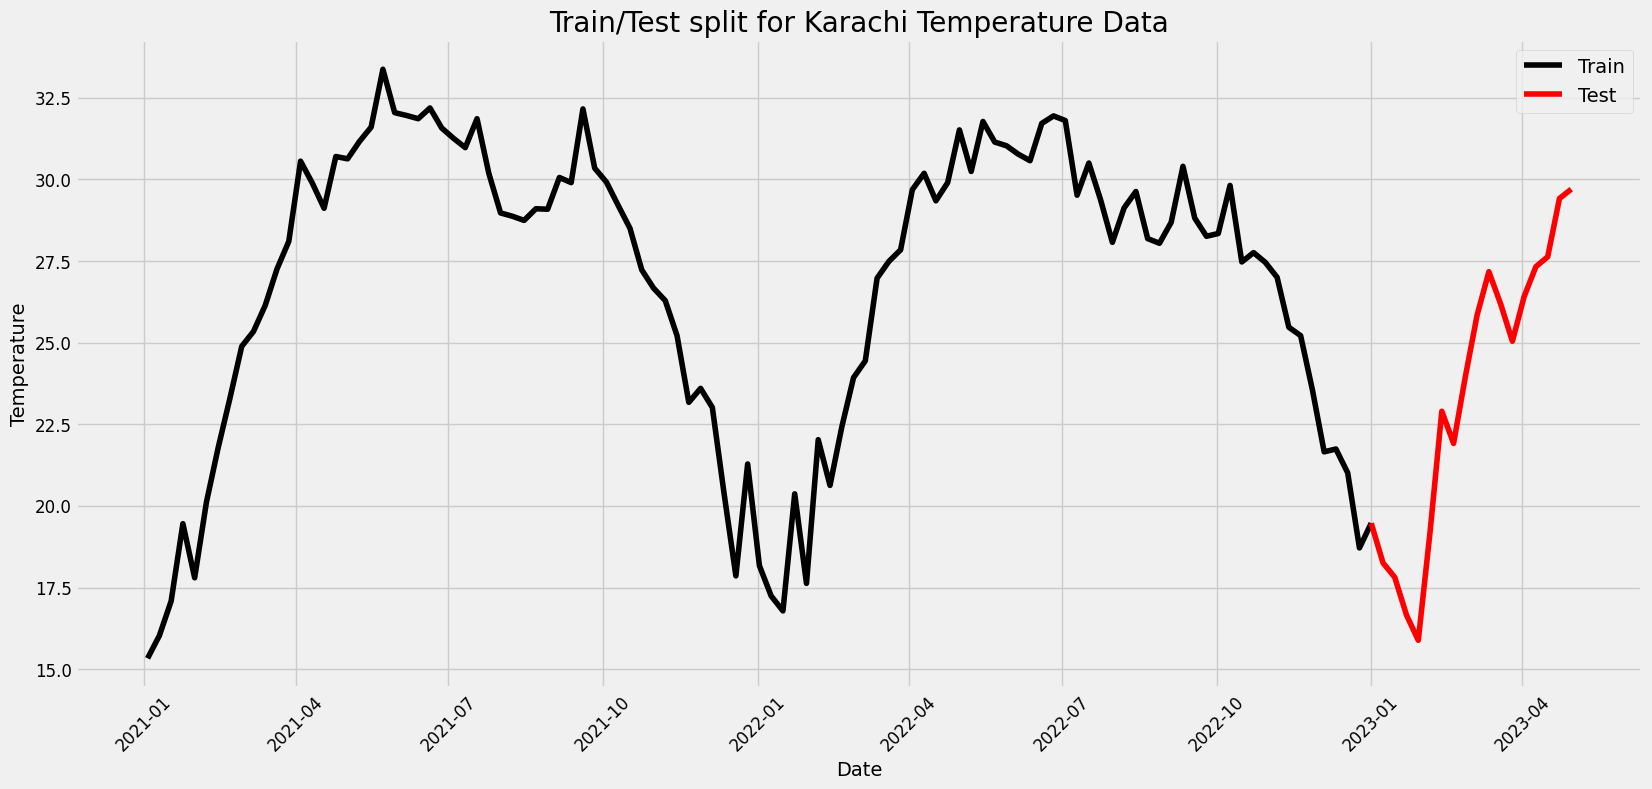

In [ ]:
train = weekly[weekly.index <= pd.to_datetime("2023-01-01", format='%Y-%m-%d')]
test = weekly[weekly.index >= pd.to_datetime("2023-01-01", format='%Y-%m-%d')]
plt.plot(train, color="black", label='Train')
plt.plot(test, color="red", label='Test')
plt.ylabel('Temperature')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Karachi Temperature Data")
plt.legend()
plt.show()

## Q4

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np
import itertools

Best RMSE 3.6834310636491687 with combination of (2, 2, 2) 



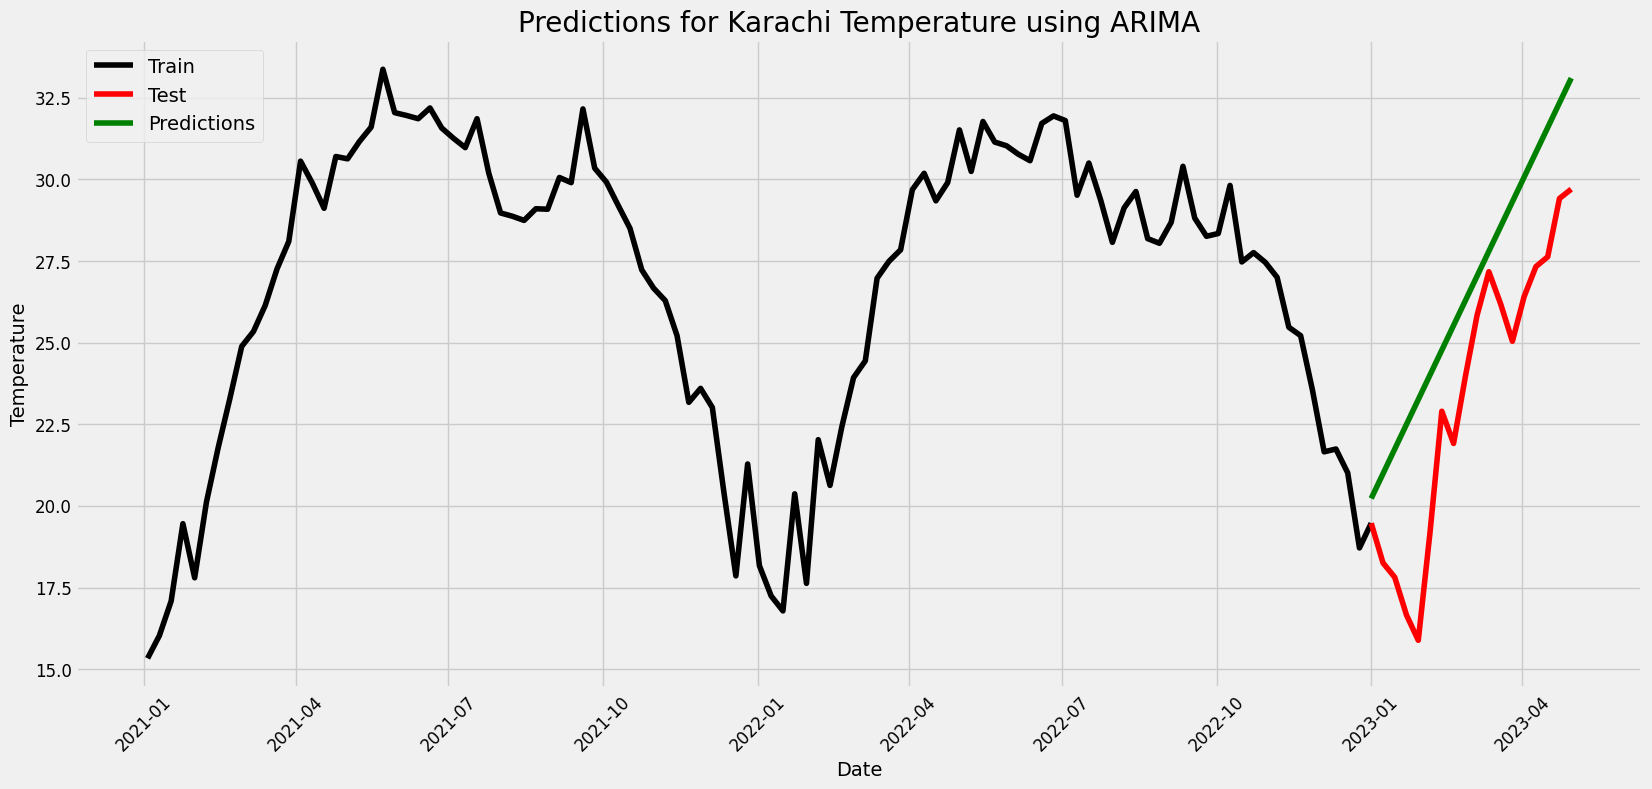

In [ ]:
def bestARIMA(p, d, q):
    ArimaModel = ARIMA(train, order=(p, d, q))
    ArimaModel = ArimaModel.fit()
    y_pred = ArimaModel.get_forecast(len(test.index))
    y_pred_df = y_pred.conf_int(alpha=0.05)
    y_pred_df['Predictions'] = ArimaModel.predict(start= y_pred_df.index[0], end= y_pred_df.index[-1])
    y_pred_df.index = test.index
    y_pred_out = y_pred_df["Predictions"]
    arma_rmse = np.sqrt(mean_squared_error(test.values, y_pred_out))
    return arma_rmse, y_pred_out

RMSE = float('inf')
n = [0, 1, 2]
combinations = list(itertools.product(n, repeat=3))
for i in combinations:
    result = bestARIMA(i[0], i[1], i[2])
    if result[0] < RMSE:
        RMSE = result[0]
        y_pred_out = result[1]

print(f'Best RMSE {RMSE} with combination of {i} \n')
plt.plot(train, color="black", label='Train')
plt.plot(test, color="red", label='Test')
plt.ylabel('Temperature')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Predictions for Karachi Temperature using ARIMA")
plt.plot(y_pred_out, color='green', label='Predictions')
plt.legend()
plt.show()

## Q5

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

Best RMSE 2.3084146417612414 with order = (1, 1, 1) and seasonalOrder = (1, 1, 1, 52) 



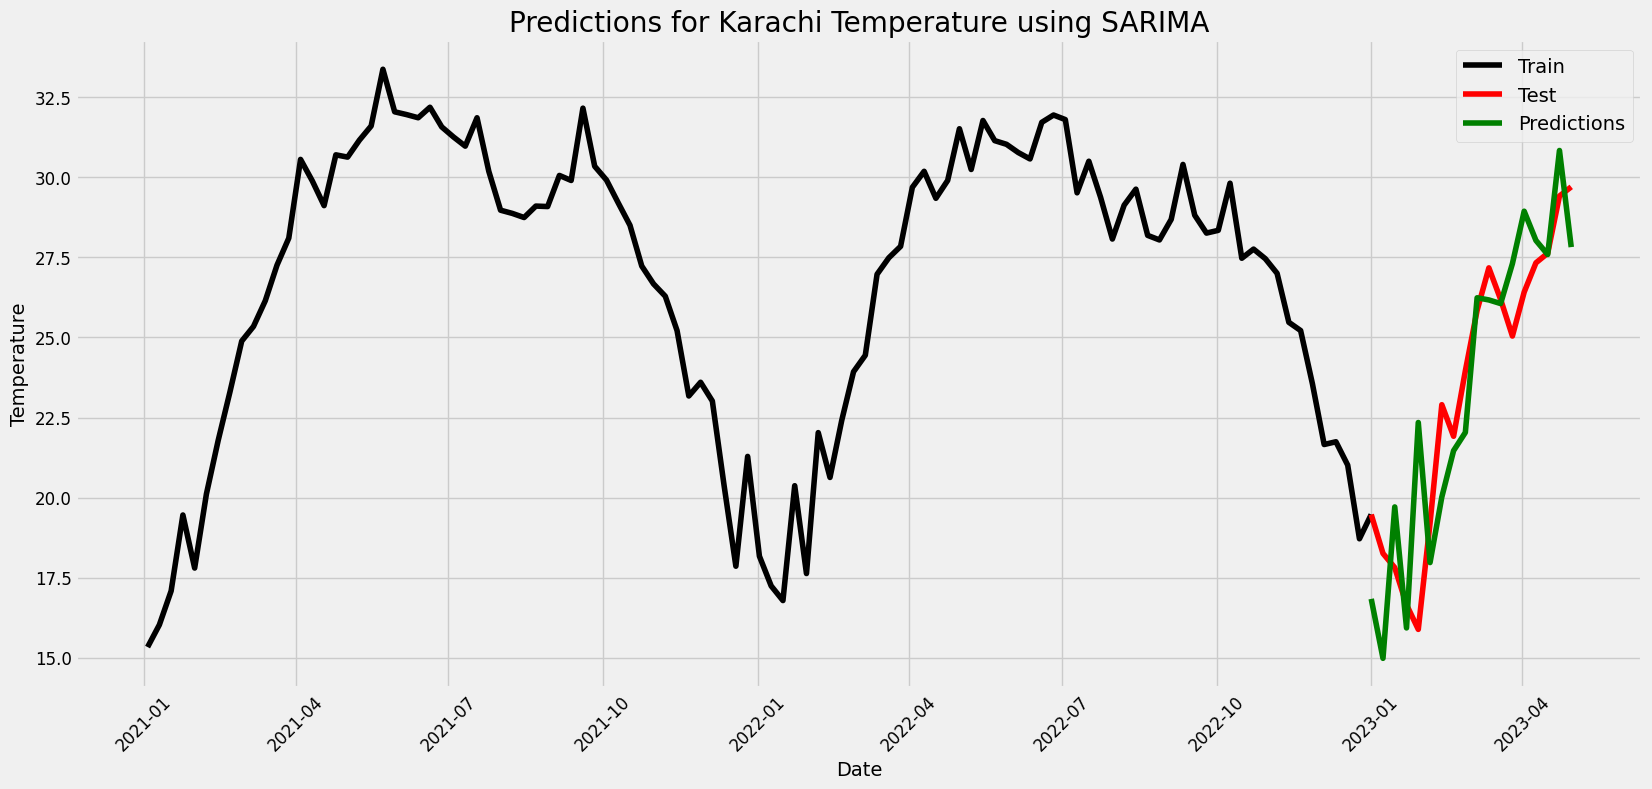

In [ ]:
def bestSARIMA(orderList, seasonalOrder):
    SARIMAXmodel = SARIMAX(train, order = orderList, seasonal_order = seasonalOrder)
    SARIMAXmodel = SARIMAXmodel.fit()
    y_pred = SARIMAXmodel.get_forecast(len(test.index))
    y_pred_df = y_pred.conf_int(alpha = 0.05) 
    y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
    y_pred_df.index = test.index
    y_pred_out = y_pred_df["Predictions"]
    arma_rmse = np.sqrt(mean_squared_error(test.values, y_pred_out))
    return arma_rmse, y_pred_out

n = [0, 1]
orderList = list(itertools.product(n, repeat=3))
seasonalList = list(itertools.product(n, repeat=3))
for i in range(len(seasonalList)):
  seasonalList[i] = (seasonalList[i][0], seasonalList[i][1], seasonalList[i][2], 52)
RMSE = float('inf')
for i in range(len(orderList)):
    result = bestSARIMA(orderList[i], seasonalList[i])
    if result[0] < RMSE:
        RMSE = result[0]
        y_pred_out = result[1]
print(f'Best RMSE {RMSE} with order = {orderList[i]} and seasonalOrder = {seasonalList[i]} \n')
plt.plot(train, color="black", label='Train')
plt.plot(test, color="red", label='Test')
plt.ylabel('Temperature')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Predictions for Karachi Temperature using SARIMA")
plt.plot(y_pred_out, color='green', label='Predictions')
plt.legend()
plt.show()


## Q6

In [ ]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 52) for x in list(itertools.product(p, d, q))]
warnings.filterwarnings("ignore")
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False
                                            )
            results = mod.fit()
            print('ARIMA{}x{}52 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 52)52 - AIC:984.8420684895568
ARIMA(0, 0, 0)x(0, 0, 1, 52)52 - AIC:494.7744164276224
ARIMA(0, 0, 0)x(0, 1, 0, 52)52 - AIC:172.65649630216632
ARIMA(0, 0, 0)x(0, 1, 1, 52)52 - AIC:4.0
ARIMA(0, 0, 0)x(1, 0, 0, 52)52 - AIC:178.74279486497463
ARIMA(0, 0, 0)x(1, 0, 1, 52)52 - AIC:172.4348483434874
ARIMA(0, 0, 0)x(1, 1, 0, 52)52 - AIC:-16.21189096721141
ARIMA(0, 0, 0)x(1, 1, 1, 52)52 - AIC:6.0
ARIMA(0, 0, 1)x(0, 0, 0, 52)52 - AIC:849.1082414922065
ARIMA(0, 0, 1)x(0, 0, 1, 52)52 - AIC:422.94360618989003
ARIMA(0, 0, 1)x(0, 1, 0, 52)52 - AIC:171.25382044885626
ARIMA(0, 0, 1)x(0, 1, 1, 52)52 - AIC:6.0
ARIMA(0, 0, 1)x(1, 0, 0, 52)52 - AIC:180.95459329646303
ARIMA(0, 0, 1)x(1, 0, 1, 52)52 - AIC:171.05959681377476
ARIMA(0, 0, 1)x(1, 1, 0, 52)52 - AIC:-14.775303225183155
ARIMA(0, 0, 1)x(1, 1, 1, 52)52 - AIC:8.0
ARIMA(0, 1, 0)x(0, 0, 0, 52)52 - AIC:367.56405761422843
ARIMA(0, 1, 0)x(0, 0, 1, 52)52 - AIC:187.7330824803878
ARIMA(0, 1, 0)x(0, 1, 0, 52)52 - AIC:201.2580770419524
A

2.6211095865174174


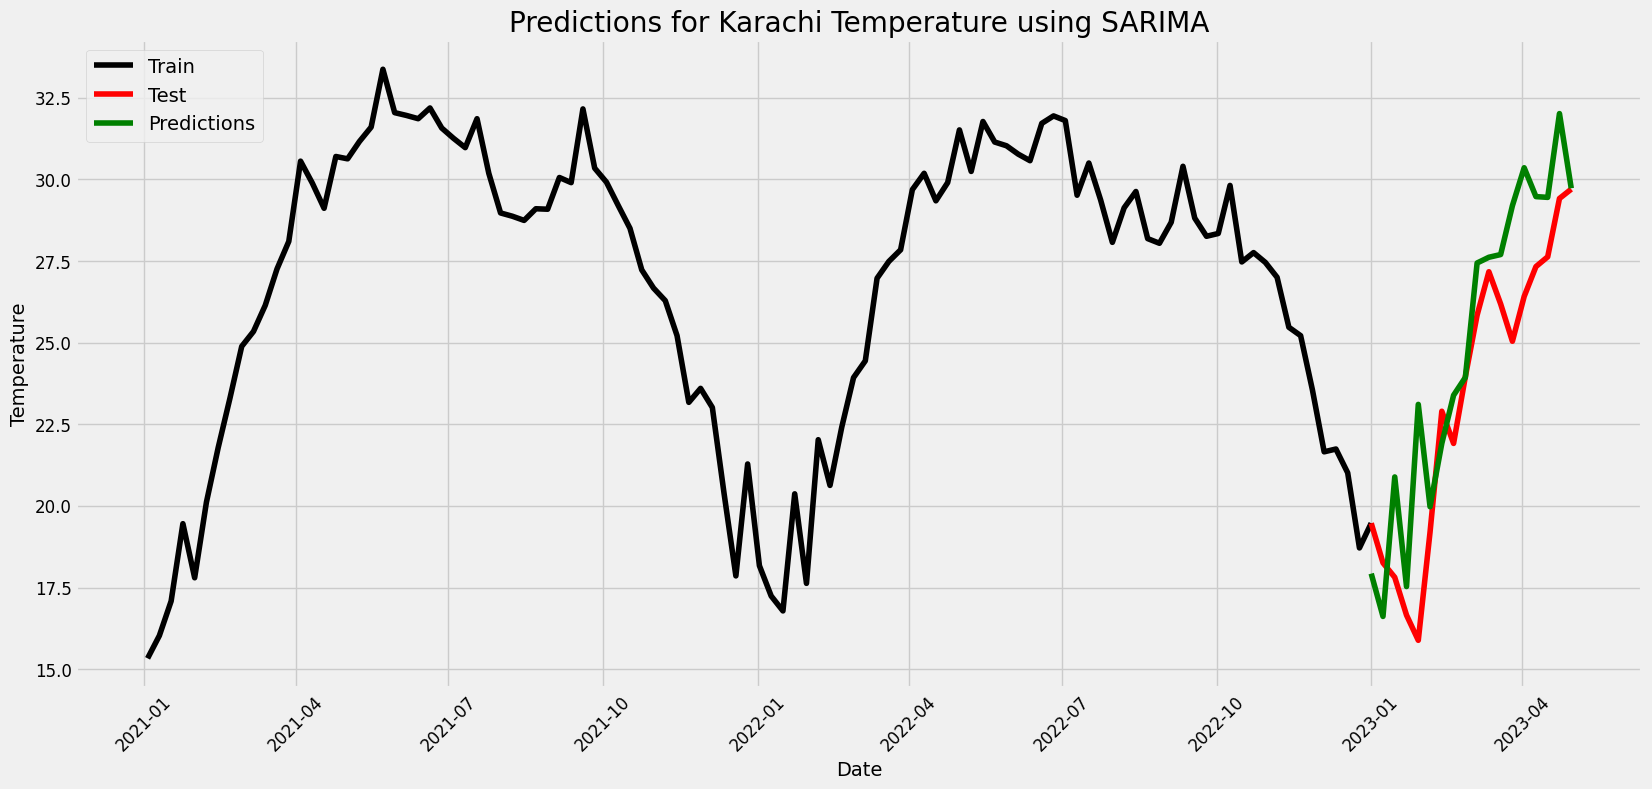

In [ ]:
result = bestSARIMA((0,0,0), (1,1,0,52))
RMSE = result[0]
y_pred_out = result[1]
print(RMSE)
plt.plot(train, color="black", label='Train')
plt.plot(test, color="red", label='Test')
plt.ylabel('Temperature')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Predictions for Karachi Temperature using SARIMA")
plt.plot(y_pred_out, color='green', label='Predictions')
plt.legend()
plt.show()

### Analysis:

## Q7

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

In [ ]:
month = [x.month for x in train.index]
year = [x.year for x in train.index]
day = [x.day for x in train.index]
X = np.array([day, month, year]).T
Y = train.values
testMonth = [x.month for x in test.index]
testYear = [x.year for x in test.index]
testDay = [x.day for x in test.index]
testX = np.array([testDay, testMonth, testYear]).T
testY = test.values

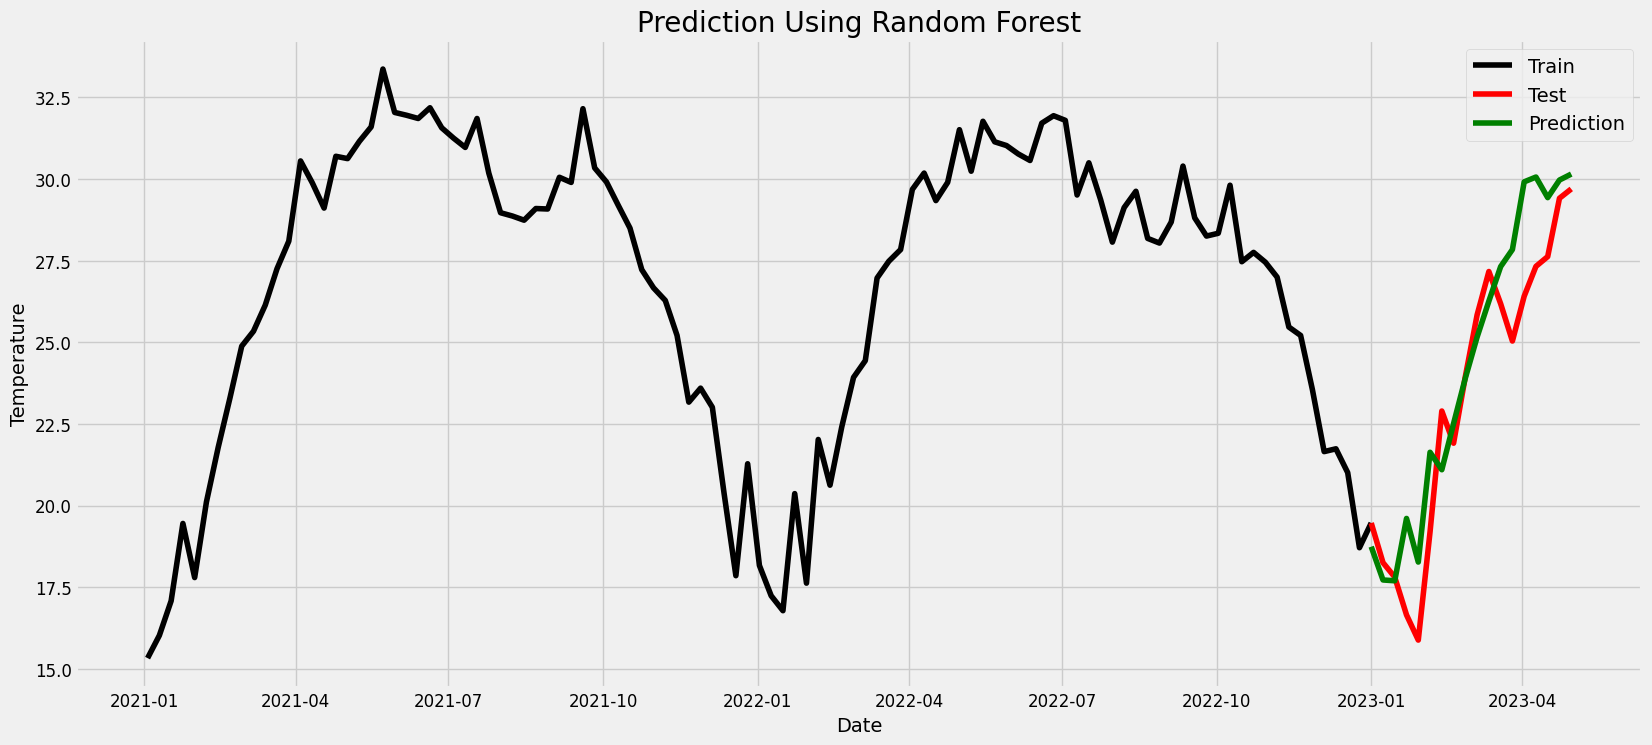

RMSE = 1.8064332897061983


In [ ]:
rfmodel = RandomForestRegressor()
rfmodel.fit(X,Y)
prediction = rfmodel.predict(testX)
plt.plot(train.index, train.values,color="black", label='Train')
plt.plot(test.index, test.values,color="red", label='Test')
plt.plot(test.index, prediction, color="green",label='Prediction')
plt.legend()
plt.ylabel('Temperature')
plt.xlabel('Date')
plt.title("Prediction Using Random Forest")
plt.show()
rmse = np.sqrt(mean_squared_error(test.values, prediction))
print(f'RMSE = {rmse}')

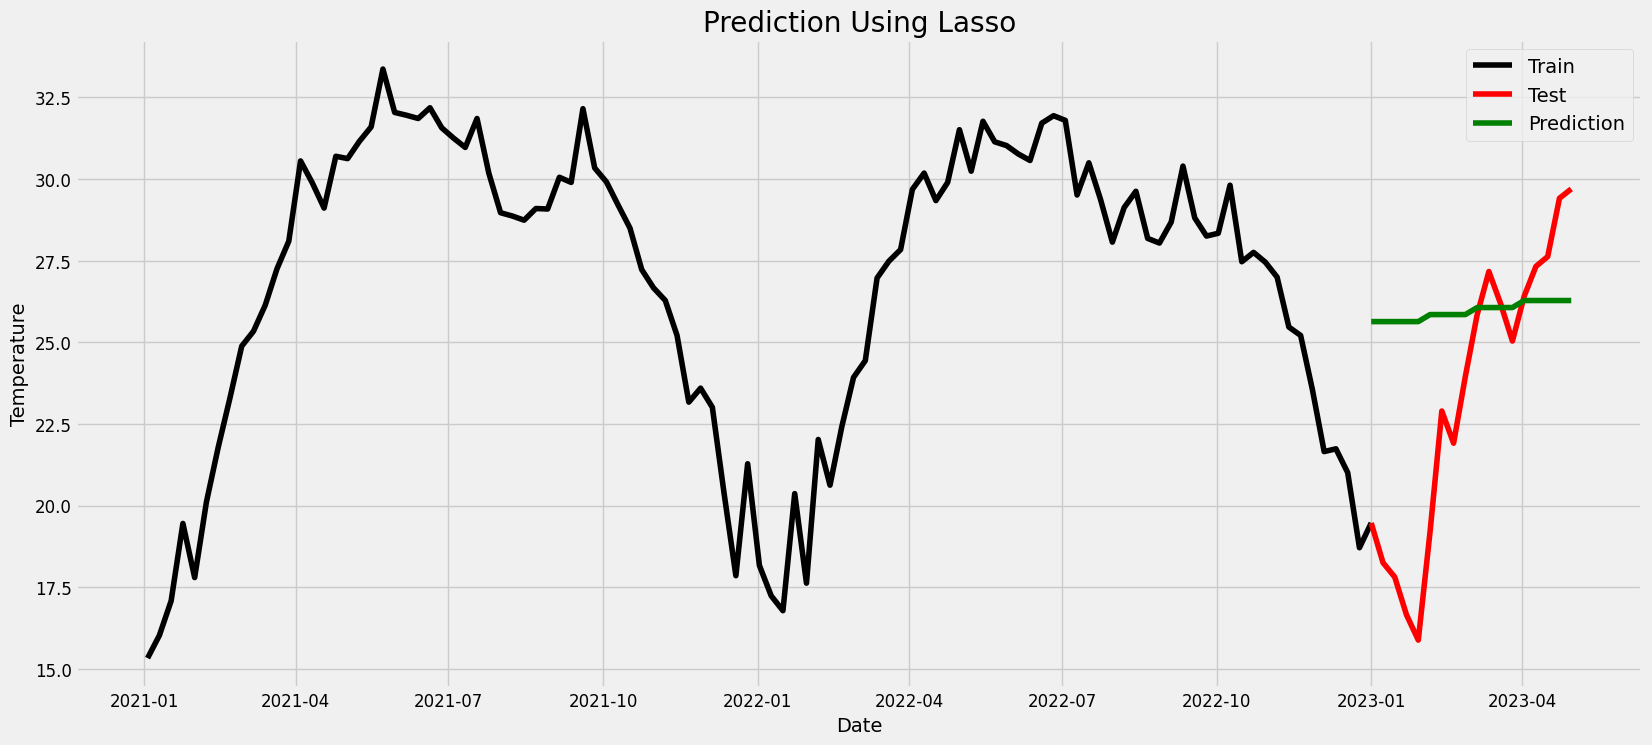

RMSE = 4.878043883878313


In [ ]:
lassoModel = Lasso(alpha=1)
lassoModel.fit(X ,Y)
prediction = lassoModel.predict(testX)
plt.plot(train.index, train.values,color="black", label='Train')
plt.plot(test.index, test.values,color="red", label='Test')
plt.plot(test.index, prediction, color="green",label='Prediction')
plt.legend()
plt.ylabel('Temperature')
plt.xlabel('Date')
plt.title("Prediction Using Lasso")
plt.show()
rmse = np.sqrt(mean_squared_error(test.values, prediction))
print(f'RMSE = {rmse}')

## Q8

ARIMA = 3.68, SARIMAX = 2.30, Random Forest = 1.80, Lasso = 4.87


After analyzing the RMSE, it appears that Random Forest regression produces the most accurate predictions with the lowest root mean square error. Although SARIMA is a suitable model for capturing time-dependent relationships and seasonality, Random Forest Regression and Lasso Regression are machine learning models that can capture non-linear relationships between the target variable and features. Despite the similarity in the data, SARIMA may not necessarily provide the best results, as Random Forest Regression performs slightly better by only 0.09 units. However, the effectiveness of these models depends on the input values, and optimizing the parameters can be difficult, such as finding the optimal p, q, and d values for ARIMA, or adjusting the alpha value for Lasso Regression. Nonetheless, Random Forest Prediction is an ensemble learning method that combines multiple decision trees to make predictions, and it achieved the lowest RMSE, making it the best prediction model out of the rest.

## Q9

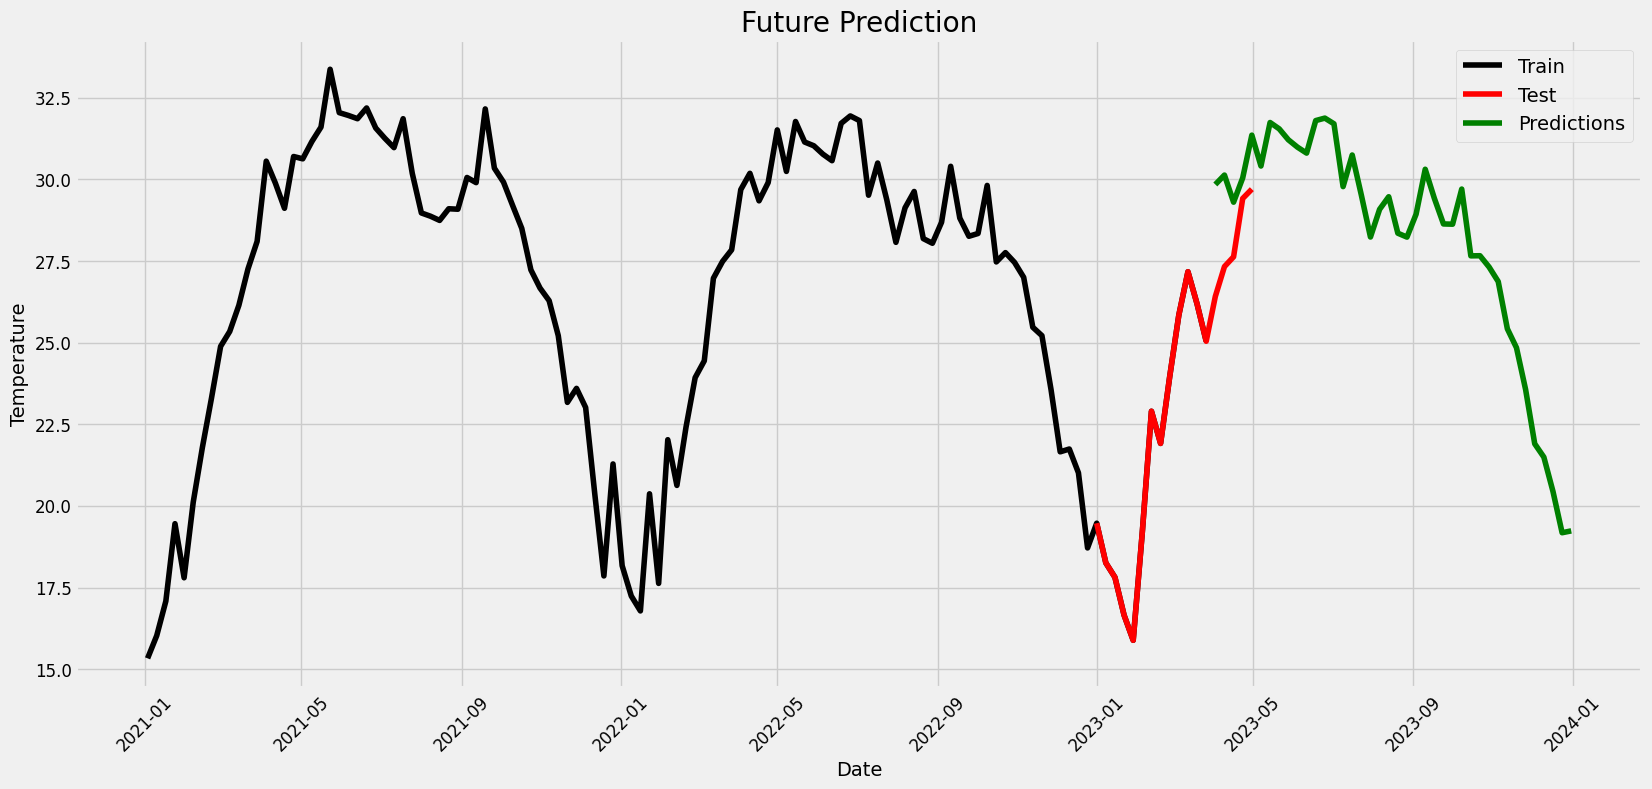

In [ ]:
future = pd.date_range(start='04/01/2023', end='12/31/2023', freq='W')
train = weekly[weekly.index < pd.to_datetime("2023-04-01", format='%Y-%m-%d')]
SARIMAXmodel = SARIMAX(train, order=(0, 0, 0), seasonal_order=(1, 1, 0, 52))
SARIMAXmodel = SARIMAXmodel.fit()

y_pred = SARIMAXmodel.get_forecast(steps = len(future))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = y_pred.predicted_mean
# y_pred_df["Predictions"]

plt.plot(train, color="black", label='Train')
plt.plot(test, color="red", label='Test')
plt.ylabel('Temperature')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Future Prediction")
plt.plot(y_pred_df['Predictions'], color='green', label='Predictions')
plt.legend()
plt.show()

## Q10

In [ ]:
month = [x.month for x in train.index]
year = [x.year for x in train.index]
day = [x.day for x in train.index]
X = np.array([day, month, year]).T
Y = train.values

future_df = pd.DataFrame(index = future)

testMonth = [x.month for x in future_df.index]
testYear = [x.year for x in future_df.index]
testDay = [x.day for x in future_df.index]

testX = np.array([testDay, testMonth, testYear]).T
testY = future_df.values

rfmodel = RandomForestRegressor()
rfmodel.fit(X,Y)
prediction = rfmodel.predict(testX)
future_df["Prediction"] = prediction
future_df

# plt.plot(train.index, train.values,color="black", label='Train')
# plt.plot(test.index, test.values,color="red", label='Test')
# plt.plot(test.index, prediction, color="green",label='Prediction')
# plt.legend()
# plt.ylabel('Temperature')
# plt.xlabel('Date')
# plt.title("Prediction Using Random Forest")
# plt.show()

,Prediction
2023-04-02,29.947714
2023-04-09,30.064857
2023-04-16,29.620286
2023-04-23,30.098429
2023-04-30,30.127000
2023-05-07,30.686143
2023-05-14,31.504714
2023-05-21,31.429286
2023-05-28,31.226571
2023-06-04,31.119429


## Q11

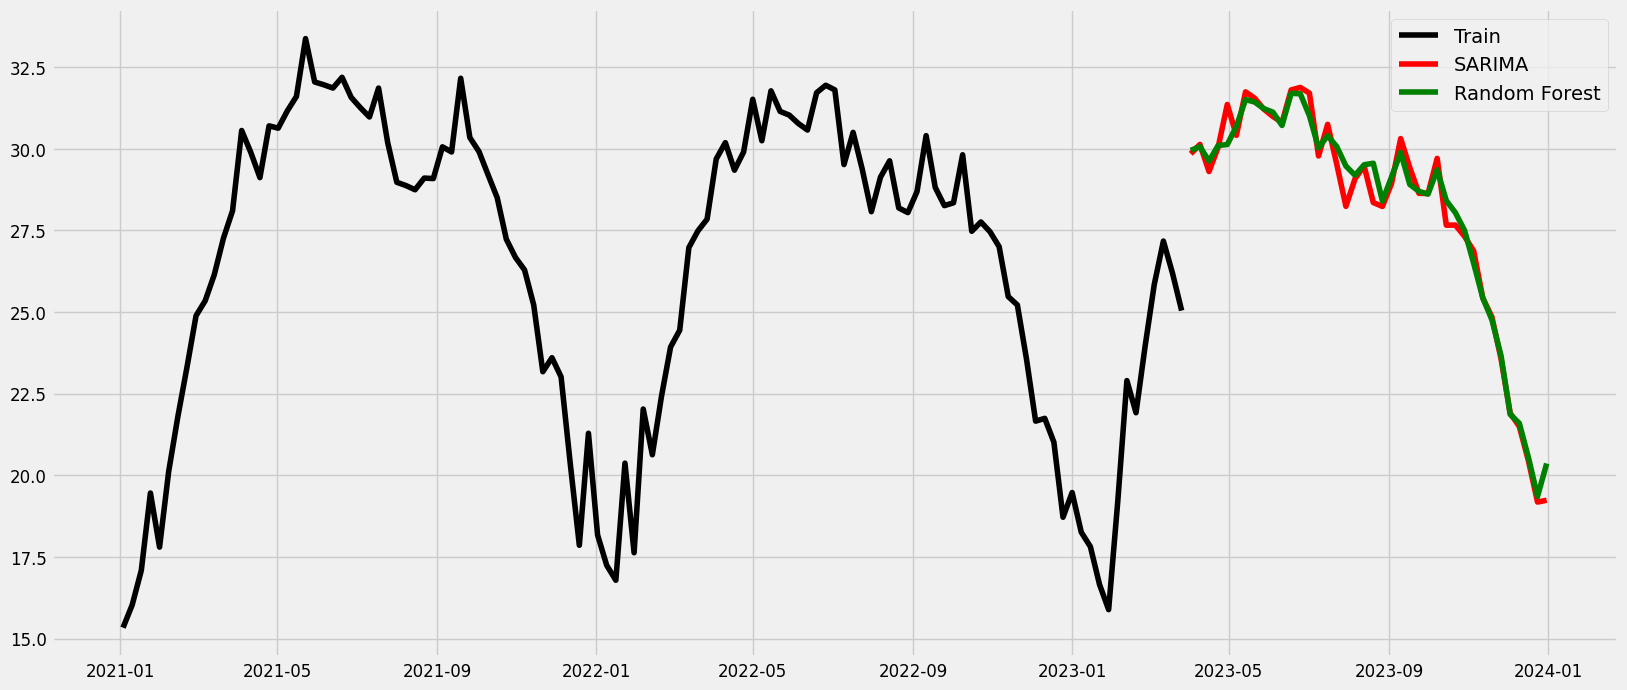

In [ ]:
plt.plot(train.index, train.values,color="black", label='Train')
plt.plot(y_pred_df.index, y_pred_df["Predictions"],color="red", label='SARIMA')
plt.plot(future_df.index, prediction, color="green",label='Random Forest')
plt.legend()
plt.show()

### Analysis:

From the diagram we can see that both model almost does the same job in predicting the future temperatures. Both follow a similar trend and almost has overlapping values.